In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

In [106]:
f = h5py.File("/home/anshul/git/DACPS/logging/logs2.txt", 'r', libver='latest', swmr=True)

In [107]:
move_q =  f['statistics']["ep_reward"][:]

In [108]:
move_q

array([-3007.775  ,   -99.81449, -2479.0693 , ...,     0.     ,
           0.     ,     0.     ], dtype=float32)

-2718.8174
-2774.8687
-2589.2126
-2828.3333
-2636.2097
-2605.228
-2484.9902
-2637.5605
-2808.575
-2714.396
-2654.0642
-2375.4617
-2107.2178
-2109.1746
-1681.0472
-2114.9197
-2153.5215
-2379.3137
-2469.4143
-2070.532


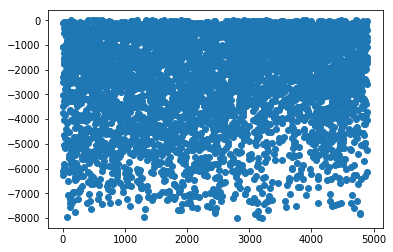

In [112]:
num_eps = 4900
plt.scatter(range(num_eps), move_q[:num_eps])
buckets = 20
for i in range(buckets):
    print np.mean(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets])

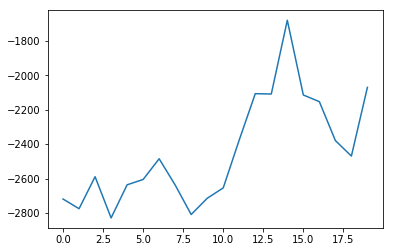

In [113]:
buckets = 20
plt.plot(range(buckets), [np.mean(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])

In [114]:
avg_q =  f['statistics']["ep_avgq"][:]

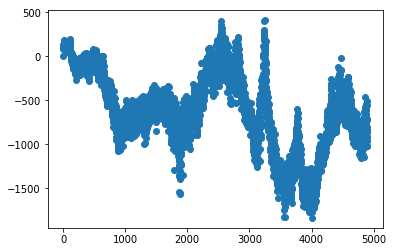

In [115]:
plt.scatter(range(num_eps), avg_q[:num_eps])

<HDF5 group "/statistics" (2 members)>
